In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.metrics import *
import seaborn as sns
from pathlib import Path
from mpl_toolkits.mplot3d import axes3d
print ("The libraries have been loaded.")

The libraries have been loaded.


In [2]:
data = pd.read_csv(r'C:\Users\Leonardo\Desktop\Projetos Python\Pesquisa\advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
x = data.drop('Sales', axis=1)
print(x.shape)
y= data['Sales']
print(y.shape)
filepath = Path(f'C:\\Users\\Leonardo\\Desktop\\Projetos Python\out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
x.to_csv(filepath)  

(200, 3)
(200,)


In [4]:
x_train_sm = sm.add_constant(x)
lr= sm.OLS(y,x_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           8.13e-99
Time:                        17:20:04   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

In [5]:
# Is there a relationship between sales and advertising budget?
print(f'{data.isnull().sum()}\n')

print(lr.pvalues)

print(f'\n''With the P-value, we can estimate if there is or not a relationship between the advertisements and the sales. In this case, the p-value is very low, so we can infer that there is a relationship between them.')


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

const        1.682677e-34
TV           1.892945e-95
Radio        4.602097e-27
Newspaper    9.538145e-01
dtype: float64

With the P-value, we can estimate if there is or not a relationship between the advertisements and the sales. In this case, the p-value is very low, so we can infer that there is a relationship between them.


In [6]:
# How strong is the relationship?
# Mean Value
print(f'Mean Value: {round(np.sqrt(lr.df_resid), 3)}\n')
# Mean squared error
print(f'RSE is: {round(np.sqrt(lr.mse_resid), 3)}\n')
#Error
print(f'Percentage error: {round(((np.sqrt(lr.mse_resid))/(np.sqrt(lr.df_resid))), 4)*100} % \n')
#R squared
print(f'R squared: {round(lr.rsquared, 3)}\n')


Mean Value: 14.0

RSE is: 1.662

Percentage error: 11.87 % 

R squared: 0.903



In [85]:
# Which media are associated with sales?
print(f'TV P-value: {lr.pvalues.TV} \nTV T-statistic: {lr.tvalues.TV}')
print('\n')
print(f'Radio P-value: {lr.pvalues.Radio} \nRadio T-statistic: {lr.tvalues.Radio}')
print('\n')
print(f'Newspaper P-value: {lr.pvalues.Newspaper} \nNewspaper T-statistic: {lr.tvalues.Newspaper}')
print('\n')
print('In this results, we can conclude that the TV and Radio advertising have a solid relation with sales')

TV P-value: 1.892944798183285e-95 
TV T-statistic: 39.59152447549327


Radio P-value: 4.602096565404695e-27 
Radio T-statistic: 12.603856554623393


Newspaper P-value: 0.953814495225266 
Newspaper T-statistic: 0.057991479148421995


In this results, we can conclude that the TV and Radio advertising have a solid relation with sales


Confidence Intervals: 
TV: (0.052, 0.057)
Radio: (0.090, 0.124)
Newspaper: (-0.011, 0.012)

The Confidence Intervals give us indications that the variables have a relation with sales. 
In this case we can see that Newspaper is really close to zero, a indication that it is not statistically significant, considering TV and Radio
We can see that TV has the highest association with sales, Radio has a smaller but significant association and Newspaper has almost none relation with sales.


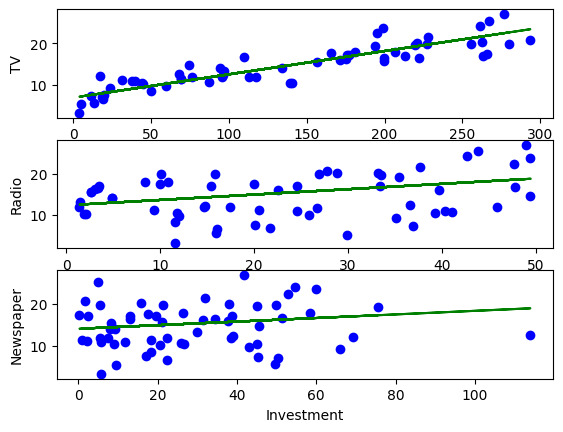

In [86]:
#How large is the association between each medium and sales?

print('Confidence Intervals: \nTV: (0.052, 0.057)\nRadio: (0.090, 0.124)\nNewspaper: (-0.011, 0.012)')

print('\nThe Confidence Intervals give us indications that the variables have a relation with sales. \nIn this case we can see that Newspaper is really close to zero, a indication that it is not statistically significant, considering TV and Radio')

#Linear Regression for every variable: 

#TV

Xtv = data['TV'].values
Xtv= Xtv.reshape(-1,1)
xtv_train, xtv_test, y_train, y_test  = train_test_split(Xtv,y,test_size=0.3,random_state=101)
lrtv = LinearRegression() 
lmtv = lrtv.fit(xtv_train,y_train)
y_predtv = lrtv.predict(xtv_test)


#Radio

Xrad = data['Radio'].values
Xrad= Xrad.reshape(-1,1)
xrad_train, xrad_test, yrad_train, yrad_test  = train_test_split(Xrad,y,test_size=0.3,random_state=101)
lrrad = LinearRegression() 
lmrad = lrrad.fit(xrad_train,yrad_train)
y_predrad = lrrad.predict(xrad_test)

#Newspaper

Xnp = data['Newspaper'].values
Xnp= Xnp.reshape(-1,1)
xnp_train, xnp_test, ynp_train, ynp_test  = train_test_split(Xnp,y,test_size=0.3,random_state=101)
lrnp = LinearRegression() 
lmnp = lrnp.fit(xnp_train,ynp_train)
y_prednp = lrnp.predict(xnp_test)

#Plots

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.scatter(xtv_test, y_test, color= 'Blue')
ax1.plot(xtv_test, y_predtv, color = 'Green')
ax1.set_ylabel('TV')

ax2.scatter(xrad_test, yrad_test, color= 'Blue')
ax2.plot(xrad_test, y_predrad, color = 'Green')
ax2.set_ylabel('Radio')


ax3.scatter(xnp_test, ynp_test, color= 'Blue')
ax3.plot(xnp_test, y_prednp, color = 'Green')
ax3.set_ylabel('Newspaper')
ax3.set_xlabel('Investment')


print('We can see that TV has the highest association with sales, Radio has a smaller but significant association and Newspaper has almost none relation with sales.')


In [88]:
#How accurately can we predict future sales?
print(f'Considering that the error is {round(np.sqrt(lr.mse_resid), 3)} and the mean value is {round(np.sqrt(lr.df_resid), 3)}, we can calculate the percentage error that is {round(((np.sqrt(lr.mse_resid))/(np.sqrt(lr.df_resid))), 4)*100}%. So we can say that we have an average deviation of {round(((np.sqrt(lr.mse_resid))/(np.sqrt(lr.df_resid))), 4)*100}%')

Considering that the error is 1.662 and the mean value is 14.0, we can calculate the percentage error that is 11.87%. So we can say that we have an average deviation of 11.87%


As the graph has no pattern, we can infer that the relation is linear.


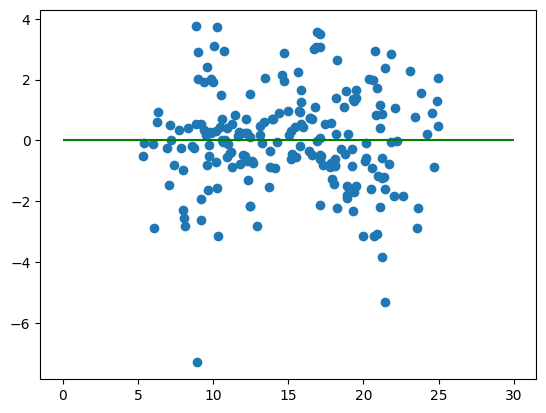

In [89]:
#Is the relationship linear?
#x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.3,random_state=101)
y_pred = lr.predict()
residuals = lr.resid
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin= 0, xmax=30,color='green')
print('As the graph has no pattern, we can infer that the relation is linear.')


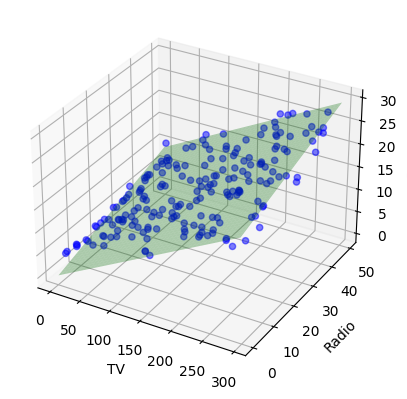

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              3999.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):                   8.33e-161
Time:                        18:26:45   Log-Likelihood:                         -466.26
No. Observations:                 200   AIC:                                      936.5
Df Residuals:                     198   BIC:                                      943.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [90]:
#Is there synergy among the advertising media?

X_synergy = pd.DataFrame({'TV': data.TV, 'Radio': data.Radio})
y = data['Sales']
lrsynergy= sm.OLS(y,X_synergy)
model = lrsynergy.fit()

x_surf, y_surf = np.meshgrid(np.linspace(data.TV.min(), data.TV.max(), 100),np.linspace(data.Radio.min(), data.Radio.max(), 100))
onlyX = pd.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
fittedY=model.predict(exog=onlyX)
fittedY=np.array(fittedY)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['TV'],data['Radio'], data['Sales'],c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='green', alpha=0.3)
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.show()
print(f'{model.summary()}\n')
print(f'{model.pvalues}')
print('\nWhen we have small p-values, the relationship between the variables tend to be non-additive, witch means that our variables dont make the result grow the same while having matching increases. In this case we can observe that we got pretty low values for them. We can infer too that when we removed the Newspaper variable, our R-squared jumped from 90% to 97%, meaning that the model fitted better with the data.')